In [ ]:
# Basic Libraries
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import pydot
import seaborn as sns

#Evaluation library
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Deep Learning libraries
import tensorflow as tf
from tensorflow.keras import layers
import keras
from keras.models import Sequential
from keras.layers.core import Dense,Activation,Dropout
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
#Digit MNIST dataset
(X_train_digit, y_train_digit), (X_test_digit, y_test_digit) = mnist.load_data()

#Fashion MNIST dataset
fashion_train=pd.read_csv("fashion-mnist_train.csv")
fashion_test=pd.read_csv("fashion-mnist_test.csv")

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
fashion_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_train_fashion = fashion_train.drop('label',axis = 1)
y_train_fashion = fashion_train['label']
X_test_fashion = fashion_test.drop('label',axis = 1)
y_test_fashion = fashion_test['label']

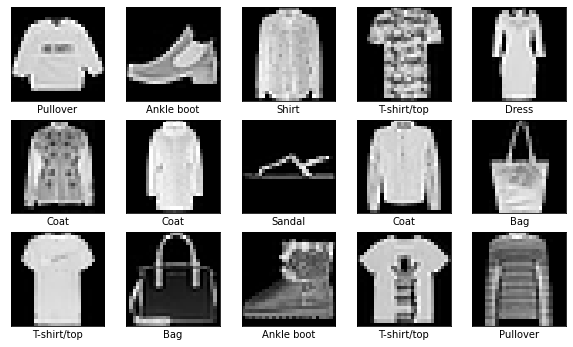

In [ ]:
#Reshaping the dataset
x_train_reshape = X_train_fashion.values.reshape(-1,28,28)
x_test_reshape = X_test_fashion.values.reshape(-1,28,28)

#Names of clothing accessories in order
col_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

#Visualizing the images
plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train_reshape[i], cmap='gray')
    plt.xlabel(col_names[y_train_fashion[i]])
plt.show()


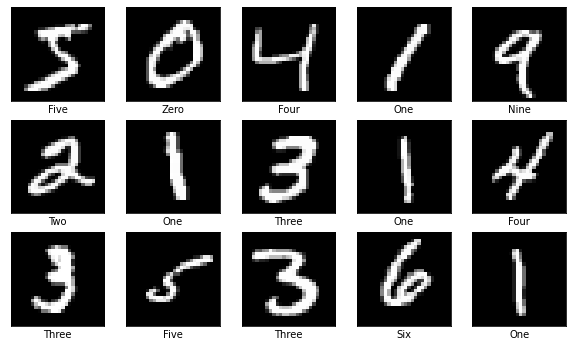

In [ ]:
#Names of numbers in the dataset in order
col_names = ['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine']

#Visualizing the digits
plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train_digit[i], cmap='gray')
    plt.xlabel(col_names[y_train_digit[i]])
plt.show()

In [ ]:
def visualize_input(img, ax):
    ax.imshow(img, cmap='summer')
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')

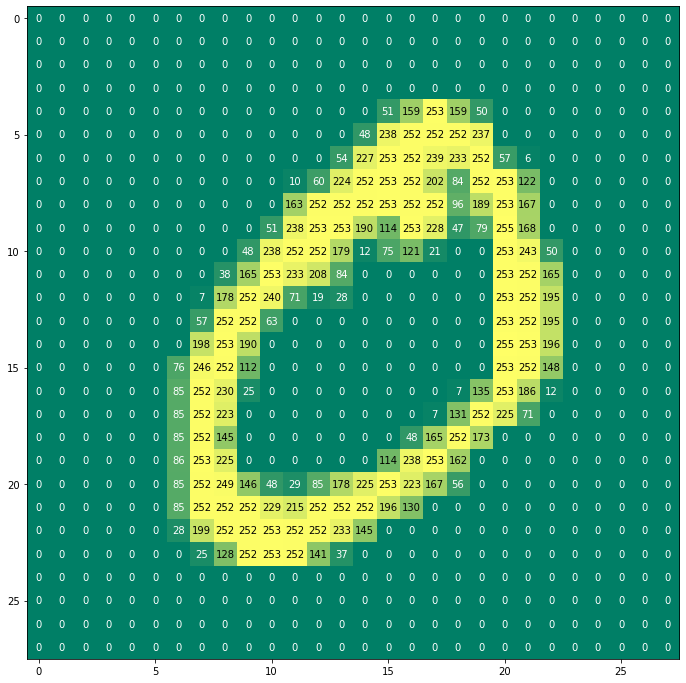

In [ ]:
#Visualizing for digit MNIST
fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(111)
visualize_input(X_train_digit[1], ax)
plt.show()

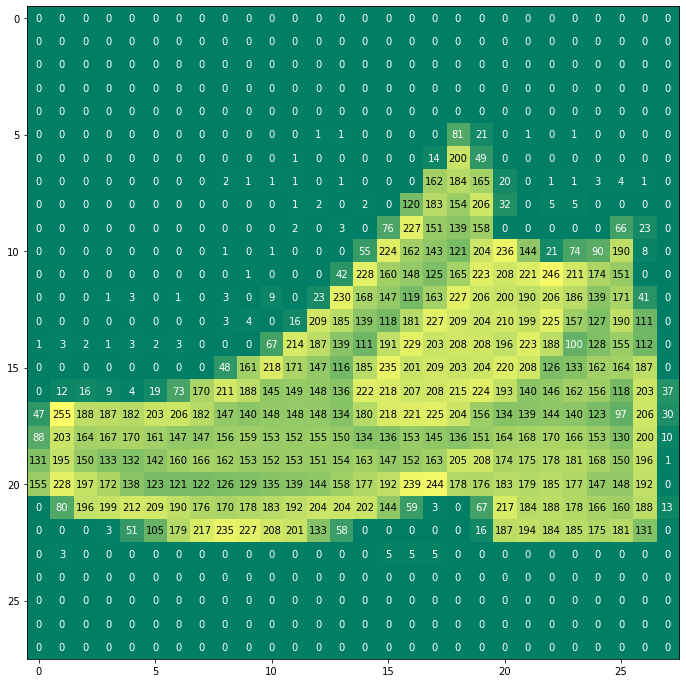

In [ ]:
#Visualizing for Fashion MNIST
fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(111)
visualize_input(x_train_reshape[1], ax)
plt.show()

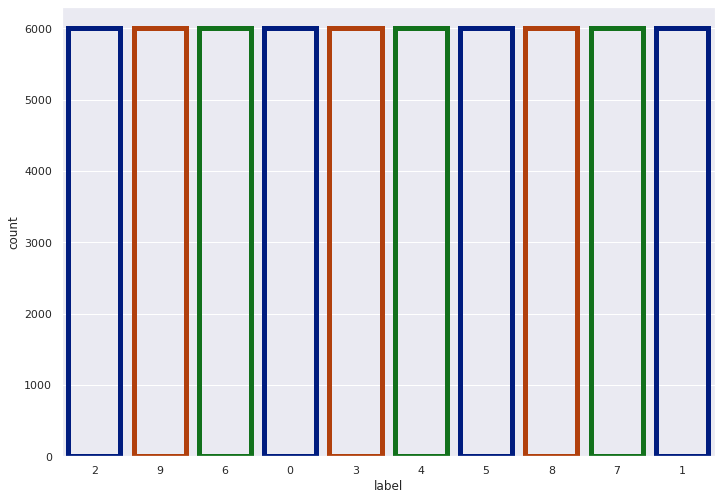

In [ ]:
#Setting plot size
sns.set(rc={'figure.figsize':(11.7,8.27)})

#Getting dataframe data
mnist=pd.read_csv("fashion-mnist_train.csv")

#Countplot
ax = sns.countplot(x="label", data=mnist,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3),
                   order = mnist['label'].value_counts().index)

In [ ]:
X_test_digit.ndim

3

In [ ]:
X_train_digit.shape

(60000, 28, 28)

In [ ]:
X_test_digit.shape

(10000, 28, 28)

In [ ]:
X_train_digit = X_train_digit.reshape(60000, 784)
X_test_digit = X_test_digit.reshape(10000, 784)

In [ ]:
X_train_digit.shape

(60000, 784)

In [ ]:
y_train_fashion[0]

2

In [ ]:

#Encoding Digit MNIST Labels
y_train_digit = to_categorical(y_train_digit, num_classes=10)

y_test_digit = to_categorical(y_test_digit, num_classes=10)


#Encoding Fashion MNIST Labels
y_train_fashion = to_categorical(y_train_fashion, num_classes=10)

y_test_fashion = to_categorical(y_test_fashion, num_classes=10)

In [ ]:
y_train_fashion[0]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
#Creating base neural network
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,)),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(24, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(24, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(10,activation='sigmoid'),
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 24)                3096      
                                                                 
 dropout_1 (Dropout)         (None, 24)                0         
                                                                 
 batch_normalization_1 (Batc  (None, 24)               96        
 hNormalization)                                        

In [ ]:
#Compiling the model
model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics = ['accuracy'])

In [ ]:
model.fit(X_train_digit, y_train_digit, batch_size=100, epochs=30)


Epoch 1/30
600/600 [==============================] - 7s 6ms/step - loss: 0.9709 - accuracy: 0.7037
Epoch 2/30
600/600 [==============================] - 4s 6ms/step - loss: 0.4846 - accuracy: 0.8657
Epoch 3/30
600/600 [==============================] - 4s 6ms/step - loss: 0.3888 - accuracy: 0.8949
Epoch 4/30
600/600 [==============================] - 4s 6ms/step - loss: 0.3367 - accuracy: 0.9098
Epoch 5/30
600/600 [==============================] - 4s 6ms/step - loss: 0.3070 - accuracy: 0.9182
Epoch 6/30
600/600 [==============================] - 4s 6ms/step - loss: 0.2851 - accuracy: 0.9229
Epoch 7/30
600/600 [==============================] - 4s 6ms/step - loss: 0.2759 - accuracy: 0.9274
Epoch 8/30
600/600 [==============================] - 5s 9ms/step - loss: 0.2663 - accuracy: 0.9298
Epoch 9/30
600/600 [==============================] - 4s 6ms/step - loss: 0.2522 - accuracy: 0.9341
Epoch 10/30
600/600 [==============================] - 4s 6ms/step - loss: 0.2469 - accuracy: 0.9341

In [ ]:

#Creating base neural network
model2 = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,)),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(24, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(24, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(10,activation='softmax'),
])

#Compiling the model
model2.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics = ['accuracy'])

#Fitting the model
model2.fit(X_train_fashion, y_train_fashion, batch_size=100, epochs=30)

Epoch 1/30
600/600 [==============================] - 5s 6ms/step - loss: 1.1186 - accuracy: 0.6198
Epoch 2/30
600/600 [==============================] - 4s 6ms/step - loss: 0.7400 - accuracy: 0.7492
Epoch 3/30
600/600 [==============================] - 4s 7ms/step - loss: 0.6813 - accuracy: 0.7678
Epoch 4/30
600/600 [==============================] - 4s 6ms/step - loss: 0.6418 - accuracy: 0.7843
Epoch 5/30
600/600 [==============================] - 4s 6ms/step - loss: 0.6252 - accuracy: 0.7893
Epoch 6/30
600/600 [==============================] - 4s 6ms/step - loss: 0.6032 - accuracy: 0.7980
Epoch 7/30
600/600 [==============================] - 4s 6ms/step - loss: 0.5980 - accuracy: 0.8009
Epoch 8/30
600/600 [==============================] - 4s 6ms/step - loss: 0.5777 - accuracy: 0.8060
Epoch 9/30
600/600 [==============================] - 4s 6ms/step - loss: 0.5743 - accuracy: 0.8088
Epoch 10/30
600/600 [==============================] - 4s 6ms/step - loss: 0.5620 - accuracy: 0.8136

In [ ]:

#Evaluating digit MNIST test accuracy
test_loss_digit, test_acc_digit = model.evaluate(X_test_digit, y_test_digit)

#Evaluating fashion MNIST test accuracy
test_loss_fashion, test_acc_fashion = model2.evaluate(X_test_fashion, y_test_fashion)

313/313 [==============================] - 1s 2ms/step - loss: 0.4061 - accuracy: 0.8672


In [ ]:
print("Digit MNIST test accuracy :" ,round(test_acc_digit))
print("fashion MNIST test accuracy :" ,round(test_acc_fashion))

Digit MNIST test accuracy : 1
fashion MNIST test accuracy : 1


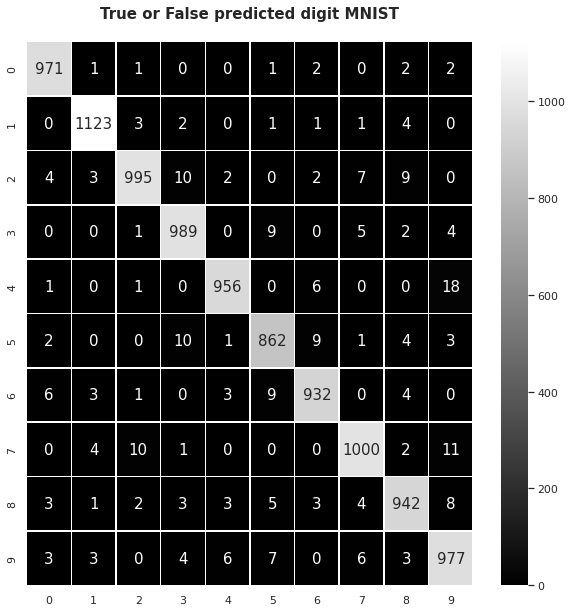

In [ ]:
#Predicting the labels-DIGIT
y_predict = model.predict(X_test_digit)
y_predict=np.argmax(y_predict, axis=1) # Here we get the index of maximum value in the encoded vector
y_test_digit_eval=np.argmax(y_test_digit, axis=1)

#Predicting the labels-Fashion
y_predict_fash = model2.predict(X_test_fashion)
y_predict_fash=np.argmax(y_predict_fash, axis=1)
y_test_fash_eval=np.argmax(y_test_fashion, axis=1)
#Confusion matrix for Digit MNIST
con_mat=confusion_matrix(y_test_digit_eval,y_predict)
plt.style.use('seaborn-deep')
plt.figure(figsize=(10,10))
sns.heatmap(con_mat,annot=True,annot_kws={'size': 15},linewidths=0.5,fmt="d",cmap="gray")
plt.title('True or False predicted digit MNIST\n',fontweight='bold',fontsize=15)
plt.show()

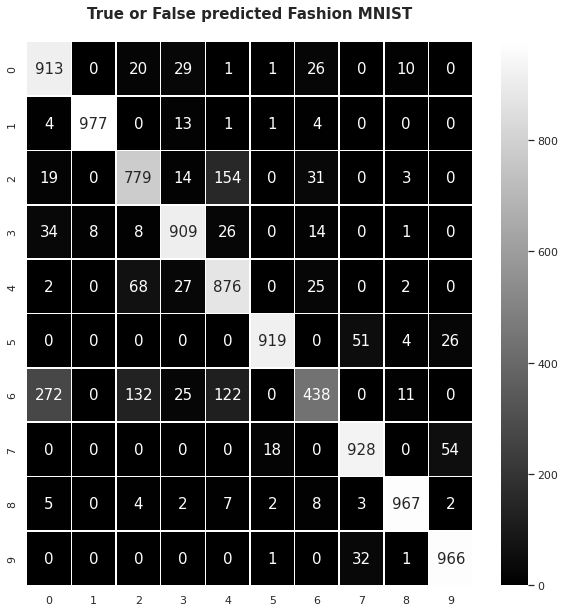

In [ ]:
#Confusion matrix for Fashion MNIST
con_mat=confusion_matrix(y_test_fash_eval,y_predict_fash)
plt.style.use('seaborn-deep')
plt.figure(figsize=(10,10))
sns.heatmap(con_mat,annot=True,annot_kws={'size': 15},linewidths=0.5,fmt="d",cmap="gray")
plt.title('True or False predicted Fashion MNIST\n',fontweight='bold',fontsize=15)
plt.show()

In [ ]:
#Function for the base neural network
def create_model(layers, activation):
    model = Sequential()
    for i, nodes in enumerate(layers):
        if i==0:
            model.add(Dense(nodes,input_dim=X_train_digit.shape[1]))
            model.add(Activation(activation))
            model.add(Dropout(0.3))
        else:
            model.add(Dense(nodes))
            model.add(Activation(activation))
            model.add(Dropout(0.3))

    model.add(Dense(units = 10, kernel_initializer= 'glorot_uniform', activation = 'softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
    return model

In [ ]:
#Using Keras classifier to apply the function
model3 = KerasClassifier(build_fn=create_model, verbose=0)

#Tuning the layers, activation function and batch sizes
layers = [(20,), (40, 20), (45, 30, 15)]
activations = ['sigmoid', 'relu','softmax']
param_grid = dict(layers=layers, activation=activations, batch_size = [128, 256], epochs=[30])

#Using GridSearchCV to fit the param dictionary
grid = GridSearchCV(estimator=model3, param_grid=param_grid,cv=5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  


In [ ]:
#Fitting the params with the training data to figure out the best params and accuracy score
grid_result = grid.fit(X_train_digit, y_train_digit)

print(grid_result.best_score_,grid_result.best_params_)

In [ ]:
#Predicting from the params we got from grid search cv
pred_y = grid.predict(X_test_digit)

y_test_digit=np.argmax(y_test_digit, axis=1)

#Confusion matrix
con_mat=confusion_matrix(y_test_digit,pred_y)
plt.style.use('seaborn-deep')
plt.figure(figsize=(10,10))
sns.heatmap(con_mat,annot=True,annot_kws={'size': 15},linewidths=0.5,fmt="d",cmap="gray")
plt.title('True or False predicted digit MNIST\n',fontweight='bold',fontsize=15)
plt.show()

In [ ]:
def create_model_fash(layers, activation):
    model = Sequential()
    for i, nodes in enumerate(layers):
        if i==0:
            model.add(Dense(nodes,input_dim=X_train_fashion.shape[1]))
            model.add(Activation(activation))
            model.add(Dropout(0.3))
        else:
            model.add(Dense(nodes))
            model.add(Activation(activation))
            model.add(Dropout(0.3))

    model.add(Dense(units = 10, kernel_initializer= 'glorot_uniform', activation = 'softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
    return model
#Using Keras classifier to apply the function
model4 = KerasClassifier(build_fn=create_model_fash, verbose=0)

#Tuning the layers, activation function and batch sizes
layers = [(20,), (40, 20), (45, 30, 15)]
activations = ['sigmoid', 'relu','softmax']
param_grid = dict(layers=layers, activation=activations, batch_size = [128, 256], epochs=[30])

#Using GridSearchCV to fit the param dictionary
grid = GridSearchCV(estimator=model4, param_grid=param_grid,cv=5)

In [ ]:
#Predicting from the params we got from grid search cv
pred_y = grid.predict(X_test_fashion)

y_test_fashion=np.argmax(y_test_fashion, axis=1)

#Confusion matrix
con_mat=confusion_matrix(y_test_fashion,pred_y)
plt.style.use('seaborn-deep')
plt.figure(figsize=(10,10))
sns.heatmap(con_mat,annot=True,annot_kws={'size': 15},linewidths=0.5,fmt="d",cmap="gray")
plt.title('True or False predicted fashion MNIST\n',fontweight='bold',fontsize=15)
plt.show()